<center>

## <font color='maroon'>ASTR 20500</font>

## <font color='maroon'>The Central Limit Theorem and measurement uncertainties 

## <font color='maroon'>Error of the mean
   
 </center>
<p><p>
    


### <font color='darkblue'>Uniform pdf in $[0,1]$</font>

$$p(x) = \begin{cases} 1,\ \mathrm{for}\ x\in[0,1]\\
0,\ \mathrm{otherwise}\end{cases}$$

mean: $\mu = \int\limits_{-\infty}^{\infty} x p(x) dx = \int\limits_0^1 x dx=\frac{x^2}{2}\vert^1_0=\frac{1}{2}$ 

central variance: $\mu_2 = \int\limits_{-\infty}^{\infty} (x -\mu)^2 p(x) dx = \int\limits_0^1 \left(x-\frac{1}{2}\right)^2dx = \int\limits_{-1/2}^{1/2}\tilde{x}^2d\tilde{x}= \frac{\tilde{x}^3}{3}\vert^{+1/2}_{-1/2}=\frac{1}{24}+\frac{1}{24}=\frac{1}{12}$

### <font color='darkblue'>Uniform pdf in $[-0.5,0.5]$</font>

$$p(x) = \begin{cases} 1,\ \mathrm{for}\ x\in[-0.5,0.5]\\
0,\ \mathrm{otherwise}\end{cases}$$

mean: $\mu = \int\limits_{-\infty}^{\infty} x p(x) dx = \int\limits_{-0.5}^{+0.5} x dx=\frac{x^2}{2}\vert_{-0.5}^{+0.5}=\frac{1}{4}-\frac{1}{4}=0$ 

central variance: $\mu_2 = \int\limits_{-\infty}^{\infty} (x -\mu)^2 p(x) dx = \int\limits_{-0.5}^{+0.5} x^2dx =  \frac{{x}^3}{3}\vert^{+0.5}_{-0.5}=\frac{1}{24}+\frac{1}{24}=\frac{1}{12}$

In [ ]:
from matplotlib import pylab as plt

def plot_hist(x, bins = 'auto', figsize = (6,6), density = True, xlabel = 'x'):
    '''
    Plot histogram of values in x 
    
    where x is either a list or numpy array
    the other arguments are simply passed to Pylab function hist 
    '''
    plt.figure(figsize = figsize) # define figure and its dimensions
    plt.xlabel(xlabel) # x-axis label
    plt.ylabel('histogram') # y-axis label
    plt.hist(x, density = density, color = 'slateblue', bins = bins) # produce histogram of xs values


In [ ]:
def gauss_line(xmin, xmax, dx=0.01, mu=0., sigma=1.):
    '''
    construct lists of x values and corresponding Gaussian pdf values with specified mu and st dev sigma
    
    Returns:
    xp, pgauss - lists of floats containing x values in the range [xmin,xmax] and pdf values p_Gauss(x)
    '''
    pgauss = []
    xp = []
    x = xmin # start at the minimum
    dx = dx * (xmax - xmin) # increase x with step dx

    while x <= xmax: 
        pgauss.append(gaussian_pdf(x, mu=mu, sigma=sigma))
        xp.append(x)
        x = x + dx
        
    return xp, pgauss

In [ ]:
from random import random 
def random_uniform(low=0., high=1., size=1):
    '''
    produce size pseudo-random numbers uniformly distributed in the interval [low, high]
    
    returns the list of the numbers of length size
    '''
    assert(size >= 1) # make sure that size is >=1
    assert(high > low)
    
    x = [None] * size
    ba = high - low
    for i in range(size): 
        x[i] = ba * random() + low 
    return x

In [ ]:
from random import random 

def uniform_mean_mc(ns, nr): 
    '''
    computes ns sums of nr uniformly distributed random numbers
    
    Parameters: 
        ns - int, number of sums to compute
        nr - int, number of random numbers to use in the sums
    Returns:
        xs - list of length ns containing sums of nr random numbers
    '''
    xs = [None] * ns

    for n in range(ns): # loop to obtain ns sums
        xsum = 0.
        for i in range(nr): # loop to obtain current sum
            xd = random() - 0.5
            xsum += xd
        xs[n] = xsum # record the sum in xs list
    return xs

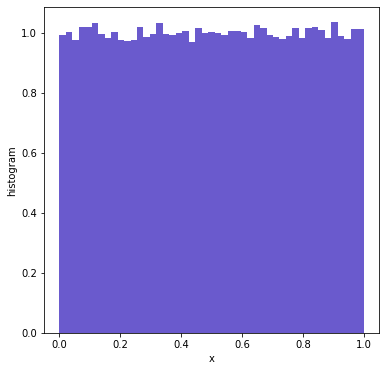

In [ ]:
a, b = 0, 1 # so we expect p(x) = 1/(b-a) within interval [a,b]
nr = 100000
# produce a list x of nr uniformly distributed random numbers using Python's random.random() function
xs = random_uniform(low=a, high=b, size = nr)

for i, xd in enumerate(xs):
    xs[i] = xd

plot_hist(xs, density=True, bins='auto')

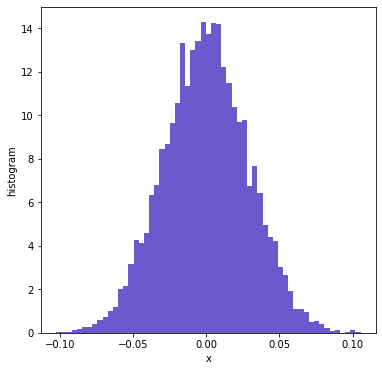

In [ ]:
from math import e
nr = 100
ns = 10000

xs = [None] * ns

for n in range(ns): # loop to obtain ns sums
    xsum = 0.
    for i in range(nr): # loop to obtain current sum
        xd = random()
        xsum += xd - 0.5
    xs[n] = xsum  / nr   # record the mean in xs list
    
plot_hist(xs, density=True, bins='auto')
plt.show()

#### <font color='darkblue'>The Central Limit Theorem:
    
If we get a certain number $N_r$ of random numbers from  a random process, then the probability distribution for the sum of their values will be approximately described by the Gaussian (aka “normal”) distribution. As $N_r$ increases, the distribution of the sums will be described by the Gaussian pdf better and better.


Gaussian pdf with mean $\mu$ and variance $\sigma^2>0$ is given by the following expression: 

$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\, \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right].$$ 



The distribution is named after Carl Fridrich Gauss - a German astronomer and mathematician who (re-)discovered it in the early 1800s, although just like for the Poisson distribution the first person who discovered it was actually another French mathematician, [Abraham de Moivre](https://en.wikipedia.org/wiki/Abraham_de_Moivre). 

### <font color='darkblue'>Attributed to Carl Fridrich Gauss (1781–1840), German astronomer and mathematician</font>

<center>
<img width=400 src=""></img></center>

<center>
 <img width=900 src="https://i.pinimg.com/originals/42/92/15/429215cf8efba0411e67eb0a6ecdbb7d.jpg"></img> 
  
</center>

#### <font color='darkblue'>young [Johann Carl Friedrich Gauß](https://heavy.com/news/2018/04/johann-carl-friedrich-gauss/)</font>

<center>
<img width=500 src="https://heavy.com/wp-content/uploads/2018/04/carl_friedrich_gauc39f_pastellgemacc88lde_von_johann_christian_august_schwartz_1803_ohne_rahmen.jpg"</img>  
</center>

#### <font color='darkblue'>Abraham de Moivre (1667 – 1754), French mathematician</font>

However, the person first to derive the normal distribution (from the binomial in the limit of large $N$) and the Central Limit Theorem was Abraham de Moivre. 

<p>
<center>
<img width=400 src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Abraham_de_moivre.jpg"></img></center>

In [ ]:
from math import e, pi

def gaussian_pdf(x, mu=0., sigma=1.):
    """
    Returns value of the Gaussian pdf with input mu, sigma for input x 

    Parameters:
    -----------
    x:     a float or a 1d numpy array of floats, input x value(s)
    mu:    a float, mean of the Gaussian (default 0)
    sigma: a float, st. deviation of the Gaussian (default 1.0)
    
    Returns:
    --------
    
    g(x): a float - value of the Gaussian pdf for input x value(s)
    """
    assert(sigma !=0.)

    return 1./(2.*pi)**0.5/sigma * e**(-0.5*((x-mu)/sigma)**2)

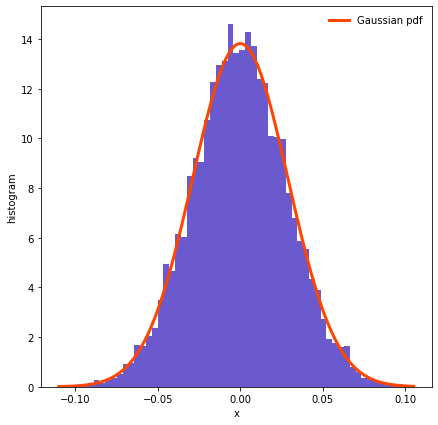

In [ ]:
# construct lists contain x values and Gaussian pdf values for a grid of x 
mu, sigma2 = 0., 1/(12*nr) # mean and variance

xp, pgauss = gauss_line(min(xs), max(xs),  mu=mu, sigma=sigma2**0.5)
plot_hist(xs, density=True, bins='auto', figsize=(7,7))
plt.plot(xp, pgauss, c='orangered', lw=3., label='Gaussian pdf')
plt.legend(loc='best', frameon=False)
plt.show()

In [ ]:
# measurements of the length of the classroom table
x = [33.0, 33.0, 33.04, 33.02, 32.98, 33.05, 33.06]
print('mean = {:.2f}'.format(sum(x) / len(x)))

mean = 33.02


### <font color='darkblue'>Relevance for measurement uncertainty</font>

<p><p>
<center>
<img align=center width=600 src="https://toolcraze.net/wp-content/uploads/2019/07/komelon-tape-measure-self-lock.jpg"></center>


In [ ]:
from matplotlib import pylab as plt
import numpy as np 

def plot_gaussian(xmin, xmax, mu = 0, s2 = 1., nplot = 1000): 
        xe = np.linspace(xmin, xmax, nplot) # use numpy functions to generate a vector of evenly spaced x values
        ge = np.exp(-0.5 * (xe - mu)**2 / s2) / np.sqrt(2. * np.pi * s2) # and compute Gaussian pdf for them
        plt.plot(xe, ge, label='Gaussian pdf', color='purple', lw=2.)
        plt.legend(loc='upper left', fontsize = 12) # place legend with labels that were defined

plt.figure(figsize = (8,6))
plt.xlabel('x', fontsize = 15)
plot_gaussian(-5, 5)
plt.show()

**_Gaussian (aka) normal pdf plays an extremely important role in statistics_** due to its ubiquity stemming from the Central Limit theorem. 

In [ ]:
ns, nr = 100000, 10
xs = uniform_mean_mc(ns, nr)

for i in range(ns): 
    xs[i] /= nr**0.5
    
plot_hist(xs)

### <font color='darkblue'>Relevance for astronomical measurement uncertainty</font>

In astronomical observations flux from a source is measured using photon counting devices, such as ["charge-coupled device" (CCD)](http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/instruments/L11/index.html). These are similar to CCDs in your phone camera, but larger and more sensitive.

<center>
<img align=center width=600 src="https://astro.uchicago.edu/~andrey/classes/a205f20/img/aperture_photometry_ccd_vik_dhillon.png"></center>

Fluxes from pixels that are deemed to be part of the source are added together to get source flux - the amount of energy per unit area of detector per unit time.  

You can read more about how fluxes of astronomical sources are measured  [here](http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/principles/L02/index.html).

### <font color='darkblue'>Distribution of flux values in pixels in an SDSS frame</font>

<center>
    
![background_pixel_flux_distribution.png](attachment:background_pixel_flux_distribution.png)

### <font color='darkblue'>pdf of flux measurement of a source obtained by summing $N$ pixels</font>


* *what do you think will be the form of the probability density function (pdf) of the flux of a source obtained by summing photon counts of say 50 pixels associated with that source?*


* Astronomers usually convert flux, $f$, to another quantity called *magnitude* related to flux as

$$m=-2.5\log_{10}\left(\frac{f}{f_0}\right),$$

where $f_0$ is called *magnitude zero point* and is chosen by some convention used to defined $m$. 

*Will the pdf of magnitude estimate be the same as pdf of flux?*

#### <font color='darkblue'>CLT: *Probability distribution of the sample mean of $n$ independent random numbers drawn from almost all pdfs converges to the Gaussian distribution for sufficiently large $n$.*</font>

What is the variance of this distribution? 

In [ ]:
from random import random

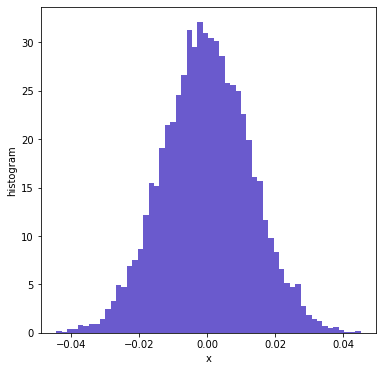

In [ ]:
nr = 500
ns = 10000

xs = [None] * ns

for n in range(ns): # loop to obtain ns sums
    xsum = 0.
    for i in range(nr): # loop to obtain current sum
        xsum += random() - 0.5
    xs[n] = xsum/nr   # record the mean in xs list
    
plot_hist(xs, density=True, bins='auto')
plt.show()

### <font color='darkblue'>Variance of a probability distribution:</font> 

is defined as expectation of $[x-E(x)]^2$:

$${\rm Var}(x) = E([x-E(x)]^2) = E(x^2 - 2xE(x) + E(x)^2) = E(x^2) -2E(x)^2 + E(x)^2 = E(x^2) - E(x)^2$$


### <font color='darkblue'>Linearity of the variance:</font> 

If $x$ and $y$ are *independent* random outcomes and $a$ and $b$ are constants

$${\rm Var}(ax+by) = a^2{\rm Var}(x) + b^2 {\rm Var}(y).$$

### <font color='darkblue'>Linearity of the variance: generalization</font> 


If $x_1$, $x_2$,..., $x_n$ are $n$ *independent* random values drawn from a probability distribution or pdf 

$${\rm Var}(c_1x_1+c_2x_2+\ldots + c_n x_n) = c_1^2{\rm Var}(x_1) + c_2^2{\rm Var}(x_2)+\ldots + c_n^2{\rm Var}(x_n).$$

### <font color='darkblue'>Variance of the sample mean</font> 

$${\rm Var}\left[\frac{1}{n}\,(x_1+x_2+\ldots + x_n)\right] = \frac{1}{n^2}\,\left[{\rm Var}(x_1) + {\rm Var}(x_2)+\ldots + {\rm Var}(x_n)\right]=\frac{n{\rm Var}(x)}{n^2}=\frac{{\rm Var}(x)}{n}.$$

### <font color='darkblue'>estimator of the variance of the sample mean</font> 

If we measure the sample mean $\bar{x}=(1/n)\,\sum_{i=0}^n x_i$, its variance is estimated as

$$\sigma^2_{\bar{x}}=\frac{\sigma^2_x}{n}=\frac{1}{n(n-1)}\,\sum\limits_{i=1}^n (x_i-\bar{x})^2$$

and ***the standard deviation (standard error) of the mean*** is: 

$$\sigma_{\bar{x}}= {\sigma_x \over \sqrt{n}}.$$

### <font color='darkblue'>Uniform pdf in $[-0.5,0.5]$</font>

$$p(x) = \begin{cases} 1,\ \mathrm{for}\ x\in[-0.5,0.5]\\
0,\ \mathrm{otherwise}\end{cases}$$

mean: $\mu = \int\limits_{-\infty}^{\infty} x p(x) dx = \int\limits_{-0.5}^{+0.5} x dx=\frac{x^2}{2}\vert_{-0.5}^{+0.5}=\frac{1}{4}-\frac{1}{4}=0$ 

central variance: $\mu_2 = \sigma^2_x=\int\limits_{-\infty}^{\infty} (x -\mu)^2 p(x) dx = \int\limits_{-0.5}^{+0.5} x^2dx =  \frac{{x}^3}{3}\vert^{+0.5}_{-0.5}=\frac{1}{24}+\frac{1}{24}=\frac{1}{12}$


so variance of the mean estimate for $n$ samples is:  

$$\sigma^2_{\bar{x}} = \frac{1}{12n}.$$

In [ ]:
import matplotlib.pylab as plt

def plot_hist_gauss(xs, mu=0, sigma2=1.):
    # construct lists contain x values and Gaussian pdf values for a grid of x 
    xp, pgauss = gauss_line(min(xs), max(xs),  mu=mu, sigma=sigma2**0.5)
    plot_hist(xs, density=True, bins='auto', figsize=(7,7))
    plt.plot(xp, pgauss, c='orangered', lw=3., label='Gaussian pdf')
    plt.legend(loc='best', frameon=False)
    plt.show()

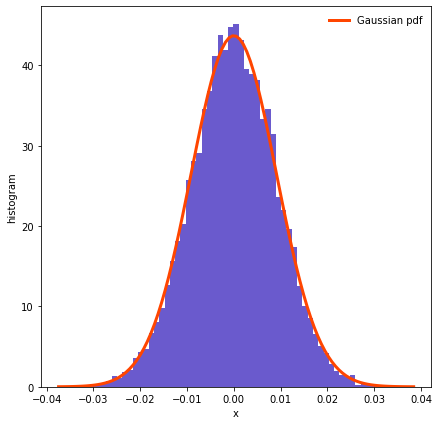

In [ ]:
# construct lists contain x values and Gaussian pdf values for a grid of x 
mu, sigma2 = 0., 1/(12*nr) # mean and variance

plot_hist_gauss(xs, mu=0, sigma2=sigma2)

### <font color='darkblue'>Ways to represent uncertainty of data</font>

The standard way: assuming that measurements have Gaussian distribution and showing "error bars" representing $\pm 1\sigma$ (or sometimes other multiple of $\sigma$) around the estimate. For example, here are magnitudes as a function of period for a sample of Cepheid stars observed in the infrared near the center of our Galaxy.  

In [ ]:
import pandas
import numpy as np

def plot_cepheid_pl():

    url = 'http://astro.uchicago.edu/~andrey/classes/a205/data/cepheids_p_l.csv'
    pad = pandas.read_csv(url)
    plt.figure(figsize=(8,8))
    plt.xlabel(r'log10(Period [days])')
    plt.ylabel('magnitude')

    # using pylab's errorbar function to plot points with "error bars"
    plt.errorbar(np.log10(pad['period']), pad['magJ'], pad['emagJ'], fmt='o', color='darkslateblue')

    plt.show()

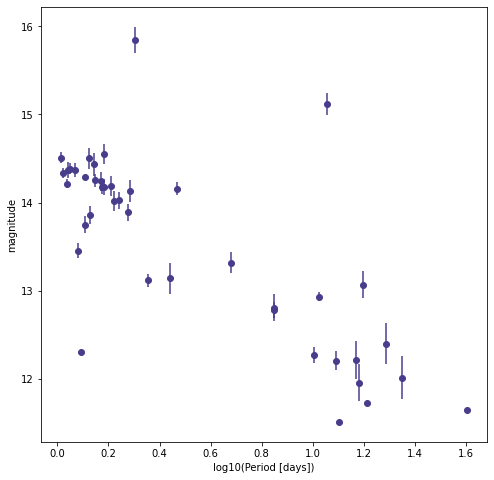

In [ ]:
plot_cepheid_pl()

### <font color='darkblue'>When can we get away with representing a measurement and its distribution just by 2 numbers:</font>
 
<center>
    
### <font color='darkblue'>  the mean value and uncertainty $\sigma$?</font>


### <font color='darkblue'>Estimating the center and width of a distribution in the presence of assymetries and outliers</font>

<br>
<center>
<img width=700 src="https://i.pinimg.com/564x/11/59/0b/11590b18f6bc8835779df8a1bc0fc271--math-jokes-math-humor.jpg"></img></center>


### <font color='darkblue'>Median of a distribution</font>

Median of a pdf $p(x)$, $x_{\rm med}$, is the value of $x$ for which total probability $<x$ is 0.5:

$$\int_{-\infty}^{x_{\rm med}} p(x)dx = 0.5.$$



### <font color='darkblue'>Median of a sample</font>

For a sample of $N$  values $x_i$, the **_sample median_** is defined as $x_{i,\rm med}$ value for which $50\%$ of the sample has values $<x_{\rm med}$.  

<p>
<center>
<img width=800 src="https://tinystats.github.io/teacups-giraffes-and-statistics/images/03_mean/median.gif"></img>

Median is often used instead of (or in addition to) the mean of the sample as the estimate of the center of the distribution, when distribution is not symmetric about the mean. The difference between the median and mean grows as assymetry of a distribution increases, as shown in the illustration above (adopted from [here](https://tinystats.github.io/teacups-giraffes-and-statistics/03_mean.html)).  

### <font color='darkblue'>Estimating the width of a distribution using "percentiles"</font>

Similarly to the median we can find a value $x_p$, for which a certain percentage ${\rm p}$ of the total probability of 1 is at $x\leq x_p$:

$$\int_{-\infty}^{x_{\rm p}} p(x)dx = {\rm p}/100.$$

For the median ${\rm p}=50$

### <font color='darkblue'>Sample "percentiles"</font>

Are defined using $x_{\rm p}$ value for which a given $\rm p$ percent of samples has values $\leq x_{\rm p}$. 

For example, we can define two values $x_{\rm 25}$  for which 25% of samples have values smaller than $x_{25}$ and $x_{75}$ for which 25% of samples have values $>x_{75}$. Then as a consequence there should be $50\%$ of samples between these values.


### <font color='darkblue'>Percentiles and the Gaussian pdf</font>

The bottom plot shows the standard way of assuming that pdf of measured quantity is Gaussian and representing its uncertainty by the standard deviation. The top plot shows the "*whisker-boxplot*" that uses median and interquartile range. 

<br>
<center>
<img width=700 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/375px-Boxplot_vs_PDF.svg.png"></img>

Distributions we often deal with in practice often exhibit strong assymetries and have outlier values in their "tails". When outliers are far from the peak of the distribution, they can bias the mean and, especially, the variance of the distribution, which makes them unreliable estimates of the mode and characteristic width of the distribution.

For distributions with significant assymetries or presence of outliers in the far tails, estimates of the ***percentiles*** of the distribution are often used. 

### <font color='darkblue'>Percentile values can be easily determined if $x$ values are sorted</font>

Think, for example, of determining percentiles for a sorted list of 100 elements...

In [ ]:
from random import randint

xlist = []

for i in range(100):
    xlist.append(randint(0,100))
    
print(xlist)
xlist.sort() # sort numbers in xlist in ascending order
print(xlist)

[28, 11, 43, 38, 88, 2, 100, 38, 82, 10, 10, 72, 8, 78, 46, 69, 12, 81, 78, 19, 36, 96, 76, 90, 79, 81, 9, 0, 66, 87, 91, 3, 34, 57, 18, 49, 38, 83, 56, 67, 7, 42, 70, 23, 73, 23, 22, 50, 9, 65, 76, 76, 31, 13, 64, 53, 4, 81, 79, 14, 79, 7, 65, 89, 98, 26, 26, 100, 21, 80, 90, 63, 22, 14, 35, 52, 3, 51, 25, 47, 47, 91, 13, 37, 2, 43, 20, 82, 61, 92, 76, 85, 95, 94, 80, 1, 26, 27, 55, 65]
[0, 1, 2, 2, 3, 3, 4, 7, 7, 8, 9, 9, 10, 10, 11, 12, 13, 13, 14, 14, 18, 19, 20, 21, 22, 22, 23, 23, 25, 26, 26, 26, 27, 28, 31, 34, 35, 36, 37, 38, 38, 38, 42, 43, 43, 46, 47, 47, 49, 50, 51, 52, 53, 55, 56, 57, 61, 63, 64, 65, 65, 65, 66, 67, 69, 70, 72, 73, 76, 76, 76, 76, 78, 78, 79, 79, 79, 80, 80, 81, 81, 81, 82, 82, 83, 85, 87, 88, 89, 90, 90, 91, 91, 92, 94, 95, 96, 98, 100, 100]


### <font color='darkblue'>Sorting algorithms (optional)</font>

<br>
<center>
<img width=700 src="https://miro.medium.com/max/894/1*ipkeWQ_Lb0lbkhB8rigxTA.png"></img>

In [ ]:
def bubble_sort_simple(x): 
    """Sort entries of list or numpy array x using the bubble sort method"""
    nx = len(x)
    swapped = True

    while swapped:
        swapped = False
        for i in range(nx-1):
            if x[i] > x[i+1]: 
                x[i], x[i+1] = x[i+1], x[i]
                swapped = True
    return x


In [ ]:
def bubble_sort(x):
    """A more efficient implementation of the bubble sort method"""
    nx = len(x)
    swapped = True
    
    k = -1
    while swapped: # continue while sorting is happening
        swapped = False
        k += 1
        for i in range(1, nx-k):
            if x[i-1] > x[i]:
                x[i-1], x[i] = x[i], x[i-1]
                swapped = True
    return x

A concise overview of simple sorting algorithms and Python implementations for the simplest of them can be found [here](https://medium.com/@george.seif94/a-tour-of-the-top-5-sorting-algorithms-with-python-code-43ea9aa02889). 

### <font color='darkblue'>A function to compute percentile of the distribution</font>

A simple definition using $p = \mathrm{prc}/100$ for a sequence of length $n$, percentile $x_{\rm p}$ is defined as the value for which fraction $p$ of the sample has values $<x_{\rm p}$. If $x_i$ values are ***sorted***: 

$$x_{\rm p} =  x_{\mathrm{int}(np) - 1}$$

where 1 is subtracted because indices start at 0 in Python. 

I will adopt a particular commonly used definition which interpolates between the two values that are closest to the required percentage for a sample of $x_i$ ***sorted by their values*** of size $n$ is

$$x_{\rm p} =  \frac{1}{2} \left[x_{\mathrm{int}(np) - 1} + x_{\mathrm{int}(np)}\right].$$

In [ ]:
def xperc(x, prc = 50):
    """Compute value corresponding to the prc-th percentile (prc = [0,100] of values in x"""
    assert(0 <= prc <= 100)
    xc = x[:]
    xc.sort()
    
    nx = len(x)
    if nx == 1: return x
    
    # next line computes ceiling because indices start at 0 in Python
    nceil = int(prc * 0.01 * len(x))
    if nceil: # percentile sufficiently large
        nfloor = nceil - 1 # this is floor index
        return 0.5 * (xc[nfloor] + xc[nceil])
    else:
        return xc[0] # if percentile is sufficiently small for the x length, don't interpolate

### <font color='darkblue'>Which percentiles to use?</font>

Although any percentile $\rm p$ can be used, in principle, the values most often encountered in data analyses are 

* quartiles: $x_{25}$ - value of $x$ for which $25\%$ of the sample have smaller values; $x_{75}$ - value for which $75\%$ of the sample larger values. And the corresponding ***inter-quartile (IRQ) range***: $x_{25}<x<x_{75}$. 


* percentile values, $x_{\rm p}$ motivated by the Gaussian distribution: $68.3\%$, $95.45\%$, $99.73%$ ($1\sigma$, $2\sigma$, $3\sigma$). 


* Other commonly used values, ${\rm p}=90,\, 95,\, 99$.  

<br>
<center>
<img width=700 src="https://pbs.twimg.com/media/DqCiR7JX4AIBUxC.jpg"></img>


**Optional reading for mathematically savvy.**
For example, for the Gaussian distribution with the mean $\mu$ (in this case mean and the median are the same) and standard deviation $\sigma$ the probability associated with values smaller than $x$ is given by what's called the ***cumulative distribution function*** (**cdf**): 

$$P(<x) = \int\limits^x_{-\infty} p_{\rm g}(x,\mu,\sigma) dx = \frac{1}{2}\left[1+\mathrm{erf}\left({z\over\sqrt{2}}\right)\right],$$

where $z = (x-\mu)/\sigma$ and $\mathrm{erf}(x)$ is a special function called [the error function](https://mathworld.wolfram.com/Erf.html), which can be computed using [<tt>scipy.special.erf</tt>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) function. 

Gaussian pdf is symmetric, so $P(<\mu - z\sigma) = P(>\mu + z\sigma)$ and probability 

$$P(\mu - z\sigma < x < \mu + z\sigma) = 1 - 2P(<\mu - z\sigma) = - \mathrm{erf}\left({z\over\sqrt{2}}\right)$$   

The name "***error function***" reflects the fact that this function is often used to estimate uncertainties for variables, which are assumed to have Gaussian distribution (often a good assumption due to the Central Limit Theorem). 

**Optional reading.** The equations that lead to the above expression for $P(<x)$ are (you can skip this, if you are not interested): 


$$P(<x) = \int\limits^x_{-\infty} p_{\rm g}(x,\mu,\sigma) dx = \int\limits^x_{-\infty} \frac{1}{\sqrt{2\pi\sigma^2}}\,e^{-\frac{(x-\mu)^2}{2\sigma^2}}\,dx = \left[z=(x-\mu)/\sigma;\ \tilde{z}=z/\sqrt{2}\right]=\frac{1}{\sqrt{\pi}}\,\int\limits^{z/\sqrt{2}}_{-\infty} e^{-\tilde{z}^2}\,d\tilde{z}.$$

Function $e^{-\tilde{z}^2}$ under the integral in the last expression is symmetric around $\tilde{z}=0$ because this variable is squared in the function. This integral taken from $-\infty$ to $\infty$ is 

$$\frac{1}{\sqrt{\pi}}\,\int\limits_{-\infty}^\infty e^{-\tilde{z}^2}\,d\tilde{z} = \frac{2}{\sqrt{\pi}}\,\int\limits^{0}_{-\infty} e^{-\tilde{z}^2}\,d\tilde{z} = \frac{2}{\sqrt{\pi}}\,\left[ \int\limits^{z/\sqrt{2}}_{-\infty} e^{-\tilde{z}^2}\,d\tilde{z} + \int\limits^{0}_{z/\sqrt{2}} e^{-\tilde{z}^2}\,d\tilde{z}\right]=1.$$

The last result is because $\int^{0}_{-\infty} e^{-\tilde{z}^2}\,d\tilde{z}=\sqrt{\pi}/2$. Thus, from the last expression on the right above:  

$$P(<x) = \frac{1}{\sqrt{\pi}}\,\int\limits^{z/\sqrt{2}}_{-\infty} e^{-\tilde{z}^2}\,d\tilde{z}=\frac{1}{2} - \frac{1}{\sqrt{\pi}}\,\int\limits^0_{z/\sqrt{2}} e^{-\tilde{z}^2}\,d\tilde{z} = \frac{1}{2} + \frac{1}{\sqrt{\pi}}\,\int\limits_0^{z/\sqrt{2}} e^{-\tilde{z}^2}\,d\tilde{z}=\frac{1}{2}\left[1+\mathrm{erf}\left({z\over\sqrt{2}}\right)\right],$$

where the *error function* $\mathrm{erf}(x)$ is defined as:

$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\,\int\limits_0^x e^{-t^2}dt.$$



In [ ]:
from scipy.special import erf

# distances z = abs(x - mu)/sigma used to select commonly used percentage of the total sample
# a list of the most commonly used z numbers
zs = [0.6745, 1., 1.645, 1.96, 2., 2.698, 3.] # = (x - mu)/sigma
print('For random numbers drawn from a Gaussian pdf:\n')

for z in zs:
    # this is 1 - 2 * P(<x) = 1 - 2*0.5*(1 + erf(z/sqrt(2))) = -erf(z/sqrt(2))
    pz = - erf(-z/2**0.5)
    print('{:.2f}% should be within {:6.4g} sigma from the mean'.format(100*pz, z))

For random numbers drawn from a Gaussian pdf:

50.00% should be within 0.6745 sigma from the mean
68.27% should be within      1 sigma from the mean
90.00% should be within  1.645 sigma from the mean
95.00% should be within   1.96 sigma from the mean
95.45% should be within      2 sigma from the mean
99.30% should be within  2.698 sigma from the mean
99.73% should be within      3 sigma from the mean


Matplotlib allows one to compute the median and IRQ and plot whisker boxplot for a sample using [<tt>pylab.boxplot</tt>](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function (see [here](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) for examples and possible customization options). 